- In this project neural networks are used to classify five different classes of flowers.
- The number of layers in the network is varied in three different experiments and the results are compared 

Importing required packages

In [2]:
import os
import PIL
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

Setting path to flowers data

In [3]:
flower_data = '/content/drive/MyDrive/flowers'
flower_data = pathlib.Path(flower_data)

In [33]:
!ls /content/drive/MyDrive/flowers

daisy  dandelion  rose	sunflower  tulip


Visualizing one of the images

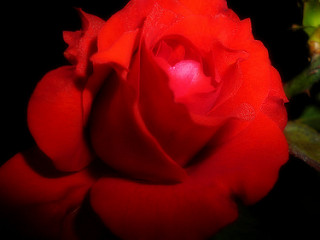

In [4]:
rose_list = list(flower_data.glob('rose/*'))
PIL.Image.open(str(rose_list[138]))

- Defining batch size
- Resizing all the images to a fixed size of 150*150
- Setting train test split 70:30

In [5]:
batch_size=128
resize_height = 150
resize_width = 150
train_test_split=0.3

Load training images 

In [6]:
flower_train = tf.keras.utils.image_dataset_from_directory(
  flower_data,
  subset="training",
  image_size=(resize_height, resize_width),
  validation_split=train_test_split,
  batch_size=batch_size,
  seed=1)

Found 4326 files belonging to 5 classes.
Using 3029 files for training.


Load test images

In [7]:
flower_validaion = tf.keras.utils.image_dataset_from_directory(
  flower_data,
  subset="validation",
  image_size=(resize_height, resize_width),
  validation_split=train_test_split,
  batch_size=batch_size,
  seed=1)

Found 4326 files belonging to 5 classes.
Using 1297 files for validation.


Defining a function to plot the training and validation, accuracy and loss.

In [8]:
def plot_accuracy(epochs, traning_metrics):
  epochs_range = range(epochs)
  training_accuracy = traning_metrics.history['accuracy']
  validation_accuracy = traning_metrics.history['val_accuracy']

  training_loss = traning_metrics.history['loss']
  validation_loss = traning_metrics.history['val_loss']

  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, training_accuracy, label='Training')
  plt.plot(epochs_range, validation_accuracy, label='Validation')
  plt.legend(loc='upper left')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, training_loss, label='Training')
  plt.plot(epochs_range, validation_loss, label='Validation')
  plt.legend(loc='lower left')
  plt.title('Loss')
  plt.tight_layout()

# EXPERIMENT-1

In [10]:
number_labels = len(flower_train.class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(resize_height, resize_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_labels)
])
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0

Training the neural network model for 10 epochs

In [11]:
epochs=10
traning_metrics = model.fit(
  flower_train,
  validation_data=flower_validaion,
  epochs=epochs
)

Epoch 1/10
24/24 [==============================] - 337s 10s/step - loss: 2.1193 - accuracy: 0.2423 - val_loss: 1.5810 - val_accuracy: 0.3277
Epoch 2/10
24/24 [==============================] - 13s 428ms/step - loss: 1.4798 - accuracy: 0.3803 - val_loss: 1.3763 - val_accuracy: 0.4133
Epoch 3/10
24/24 [==============================] - 12s 417ms/step - loss: 1.1858 - accuracy: 0.5071 - val_loss: 1.1190 - val_accuracy: 0.5366
Epoch 4/10
24/24 [==============================] - 12s 415ms/step - loss: 0.9600 - accuracy: 0.6259 - val_loss: 1.1451 - val_accuracy: 0.5251
Epoch 5/10
24/24 [==============================] - 12s 413ms/step - loss: 0.8159 - accuracy: 0.6956 - val_loss: 1.0883 - val_accuracy: 0.5598
Epoch 6/10
24/24 [==============================] - 12s 418ms/step - loss: 0.7056 - accuracy: 0.7474 - val_loss: 1.0412 - val_accuracy: 0.6076
Epoch 7/10
24/24 [==============================] - 12s 415ms/step - loss: 0.5666 - accuracy: 0.8062 - val_loss: 1.0471 - val_accuracy: 0.6191


Plot the training and validation, accuracy and loss.

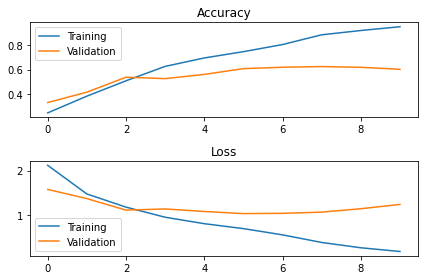

In [12]:
plot_accuracy(epochs,traning_metrics)

#EXPERIMENT 2

In [13]:
number_labels = len(flower_train.class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(resize_height, resize_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_labels)
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 32)       

Training the neural network model for 10 epochs

In [15]:
epochs=10
traning_metrics = model.fit(
  flower_train,
  validation_data=flower_validaion,
  epochs=epochs
)

Epoch 1/10
24/24 [==============================] - 14s 443ms/step - loss: 1.4463 - accuracy: 0.3618 - val_loss: 1.2765 - val_accuracy: 0.4572
Epoch 2/10
24/24 [==============================] - 13s 433ms/step - loss: 1.1948 - accuracy: 0.5226 - val_loss: 1.1578 - val_accuracy: 0.5058
Epoch 3/10
24/24 [==============================] - 13s 425ms/step - loss: 1.0795 - accuracy: 0.5748 - val_loss: 1.0602 - val_accuracy: 0.5744
Epoch 4/10
24/24 [==============================] - 13s 429ms/step - loss: 0.9657 - accuracy: 0.6220 - val_loss: 0.9615 - val_accuracy: 0.6291
Epoch 5/10
24/24 [==============================] - 13s 424ms/step - loss: 0.8958 - accuracy: 0.6543 - val_loss: 0.9503 - val_accuracy: 0.6407
Epoch 6/10
24/24 [==============================] - 13s 424ms/step - loss: 0.8450 - accuracy: 0.6633 - val_loss: 0.9204 - val_accuracy: 0.6584
Epoch 7/10
24/24 [==============================] - 13s 439ms/step - loss: 0.8029 - accuracy: 0.6903 - val_loss: 0.9015 - val_accuracy: 0.6600

Plot the training and validation, accuracy and loss

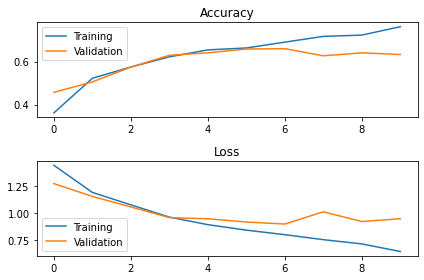

In [16]:
plot_accuracy(epochs,traning_metrics)

#EXPERIMENT-3 

In [17]:
number_labels = len(flower_train.class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(resize_height, resize_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_labels)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 32)       

Training the neural network model for 10 epochs

In [18]:
epochs=10
traning_metrics = model.fit(
  flower_train,
  validation_data=flower_validaion,
  epochs=epochs 
)

Epoch 1/10
24/24 [==============================] - 14s 439ms/step - loss: 1.4649 - accuracy: 0.3202 - val_loss: 1.4998 - val_accuracy: 0.3531
Epoch 2/10
24/24 [==============================] - 13s 429ms/step - loss: 1.1960 - accuracy: 0.4929 - val_loss: 1.1783 - val_accuracy: 0.4827
Epoch 3/10
24/24 [==============================] - 13s 428ms/step - loss: 1.0881 - accuracy: 0.5566 - val_loss: 1.0578 - val_accuracy: 0.5744
Epoch 4/10
24/24 [==============================] - 13s 426ms/step - loss: 1.0128 - accuracy: 0.5916 - val_loss: 1.0078 - val_accuracy: 0.5921
Epoch 5/10
24/24 [==============================] - 13s 429ms/step - loss: 0.9649 - accuracy: 0.6042 - val_loss: 0.9146 - val_accuracy: 0.6423
Epoch 6/10
24/24 [==============================] - 13s 425ms/step - loss: 0.8868 - accuracy: 0.6464 - val_loss: 0.9597 - val_accuracy: 0.6214
Epoch 7/10
24/24 [==============================] - 13s 436ms/step - loss: 0.8774 - accuracy: 0.6557 - val_loss: 0.8963 - val_accuracy: 0.6438

Plot the training and validation, accuracy and loss

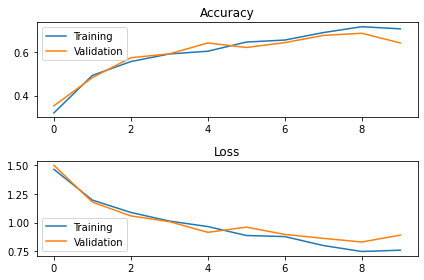

In [19]:
plot_accuracy(epochs,traning_metrics)

#COMPARING THE RESULTS

- The three experiments consist of 7, 9 and 11 layers.
- Validation accuracy after 20 epochs is compared.

In [20]:
layers=["7","11","13"]
val_accuracy=[0.6222,0.6638,0.7132]

Text(0.5, 1.0, 'Number of layers VS Accuracy')

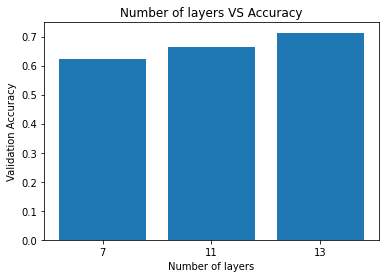

In [21]:
plt.bar(layers,val_accuracy)
plt.xlabel("Number of layers")
plt.ylabel("Validation Accuracy")
plt.title("Number of layers VS Accuracy")

In [22]:
layers=["7","11","13"]
train_accuracy=[0.8709,0.7590,0.9693]

Text(0.5, 1.0, 'Number of layers VS Accuracy')

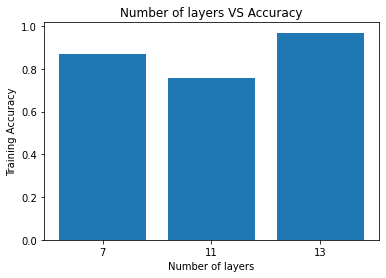

In [23]:
plt.bar(layers,train_accuracy)
plt.xlabel("Number of layers")
plt.ylabel("Training Accuracy")
plt.title("Number of layers VS Accuracy")